In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [7]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(8,8),'figure.dpi':(300)})

In [3]:
train = pd.read_csv('Data/train.csv' ,parse_dates=['date'],index_col='date')#('../input/train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv('Data/test.csv', parse_dates=['date'],index_col='date')#('../input/test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)

In [4]:
buf = df[(df.item==1)&(df.store==1)].copy() #use just item1 store1

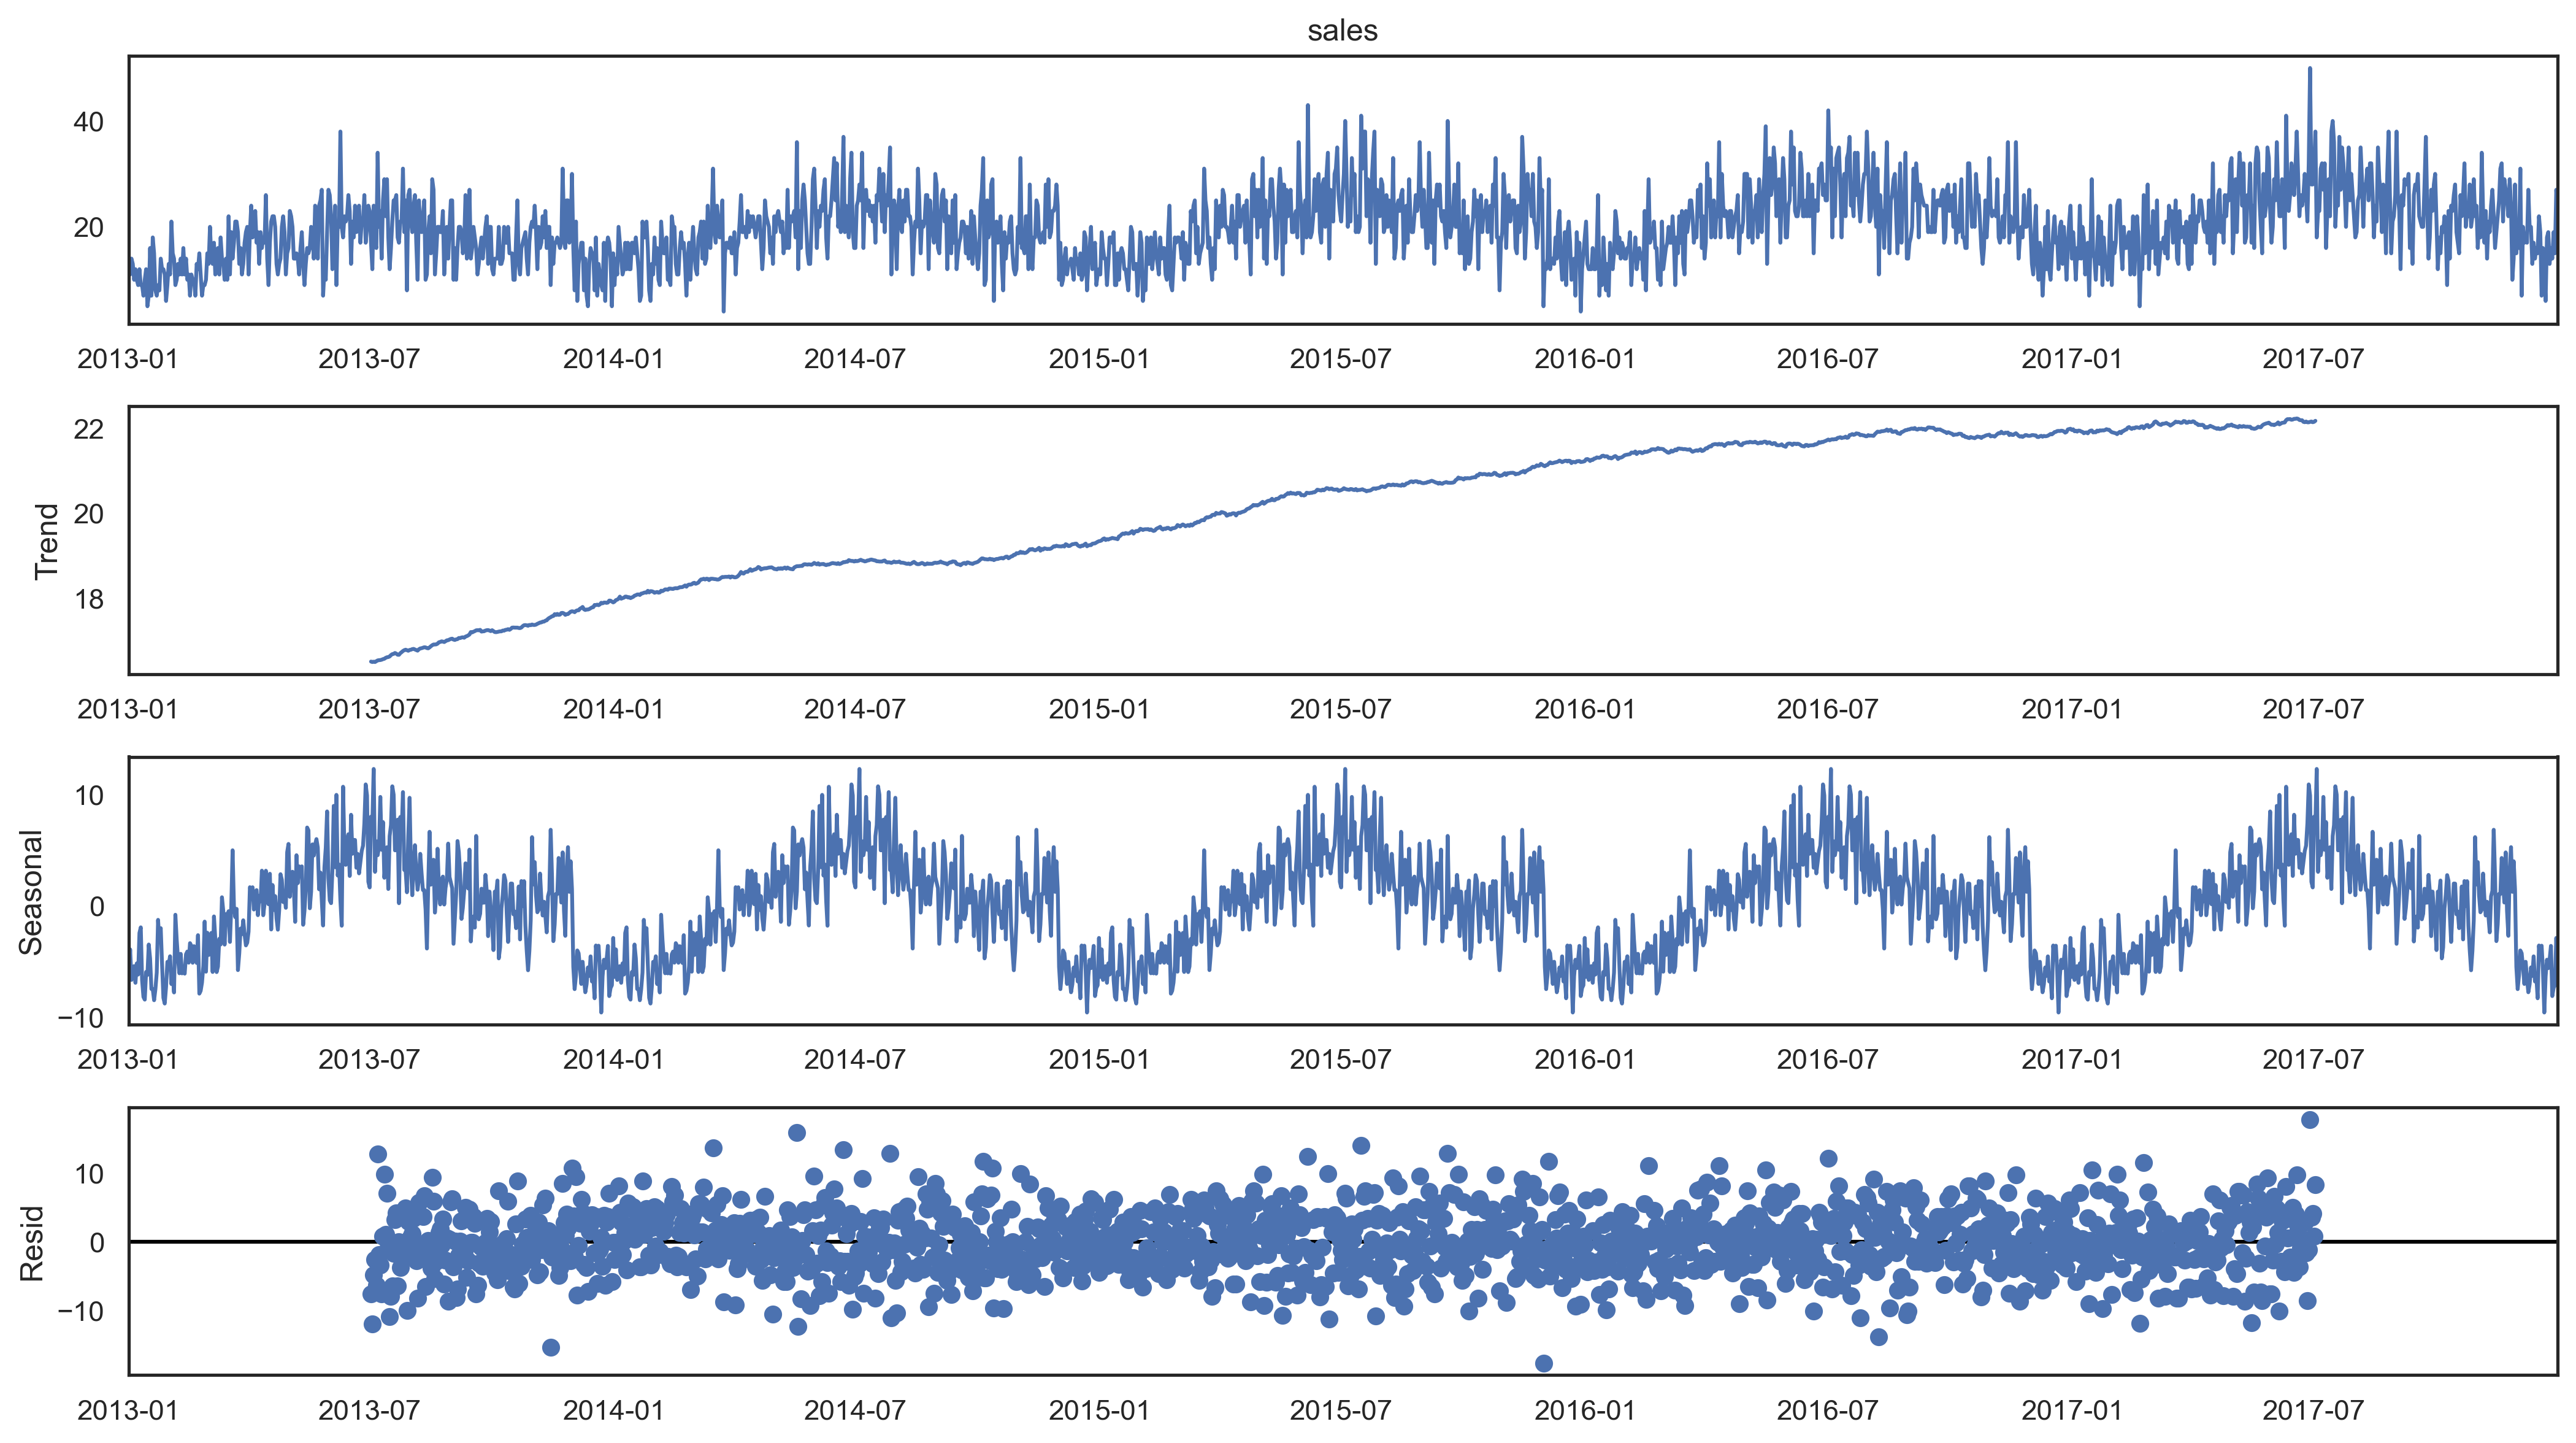

In [8]:
res = sm.tsa.seasonal_decompose(buf.sales.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [9]:
tr_start,tr_end = '2014-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
tra = buf['sales'][tr_start:tr_end].dropna()
tes = buf['sales'][te_start:te_end].dropna()

In [11]:
#ARMA Model requires stationary data, this checks for it- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
res = sm.tsa.adfuller(buf['sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.07610688992415375


In [12]:
res = sm.tsa.adfuller(buf['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.2109276320428997e-23


In [13]:
res = sm.tsa.adfuller(buf['sales']['2015-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.562064340253373


In [14]:
res = sm.tsa.adfuller(buf['sales']['2015-01-01':].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:4.530417561583986e-22


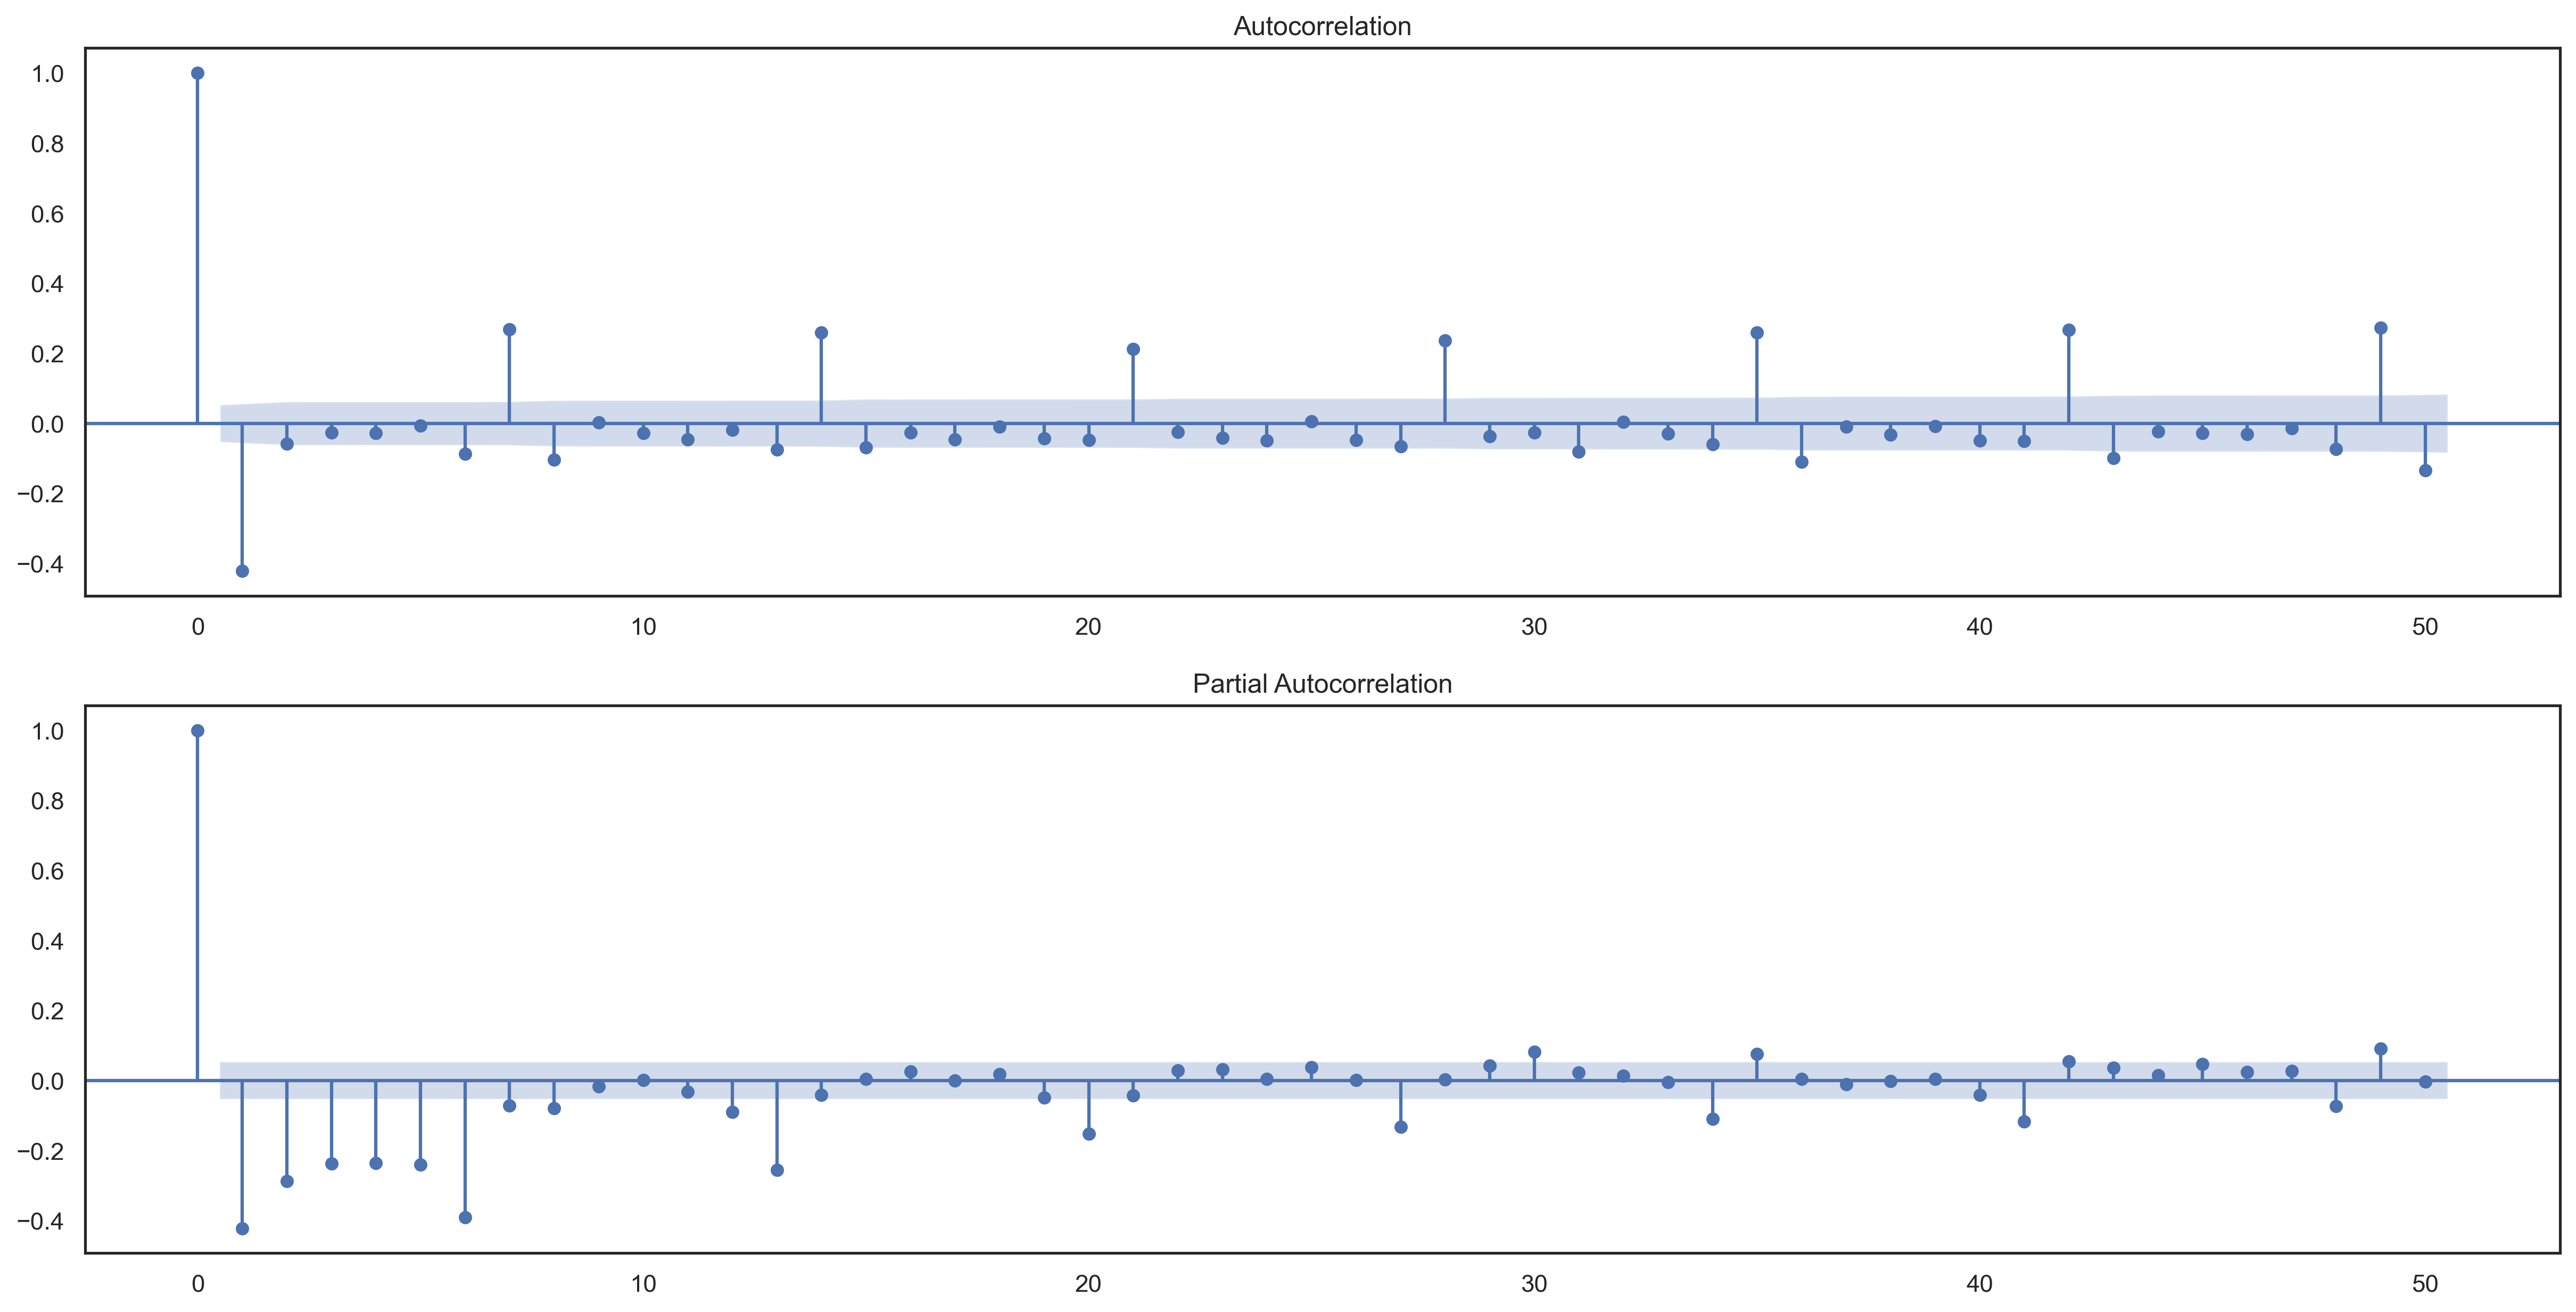

In [20]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [21]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversio

ARMA(p,q) = (7, 7) is the best.


/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [22]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/TF/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1369
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -4069.228
Date:                Sat, 14 Aug 2021   AIC                           8168.455
Time:                        18:06:46   BIC                           8246.684
Sample:                    01-01-2014   HQIC                          8197.741
                         - 09-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8861      0.037    -23.889      0.000      -0.959      -0.813
ar.L2         -0.8928      0.036    -24.788      0.000      -0.963      -0.822
ar.L3         -0.8893      0.036    -24.455      0.000      -0.961      -0.818
ar.L4         -0.8851      0.037    -24.130      0.000      -0.957      -0.813
ar.L5         -0.8930      0.035    -25.269      0.000      -0.962      -0.824
ar.L6         -0.8830      0.037    -23.840      0.000      -0.956      -0.810
ar.L7          0.1046      0.035      2.970      0.003       0.036       0.174
ma.L1          0.0395      0.025      1.558      0.119      -0.010       0.089
ma.L2          0.0979      0.042      2.340      0.019       0.016       0.180
ma.L3          0.0378      0.032      1.189      0.234      -0.024       0.100
ma.L4          0.0572      0.031      1.832      0.067      -0.004       0.118
ma.L5          0.1068      0.040      2.692      0.007       0.029       0.185
ma.L6          0.0670      0.025      2.654      0.008       0.018       0.117
ma.L7         -0.8499      0.040    -21.385      0.000      -0.928      -0.772
sigma2        24.8175      1.408     17.623      0.000      22.057      27.578
===================================================================================
Ljung-Box (L1) (Q):                   2.68   Jarque-Bera (JB):                 9.11
Prob(Q):                              0.10   Prob(JB):                         0.01
Heteroskedasticity (H):               1.35   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

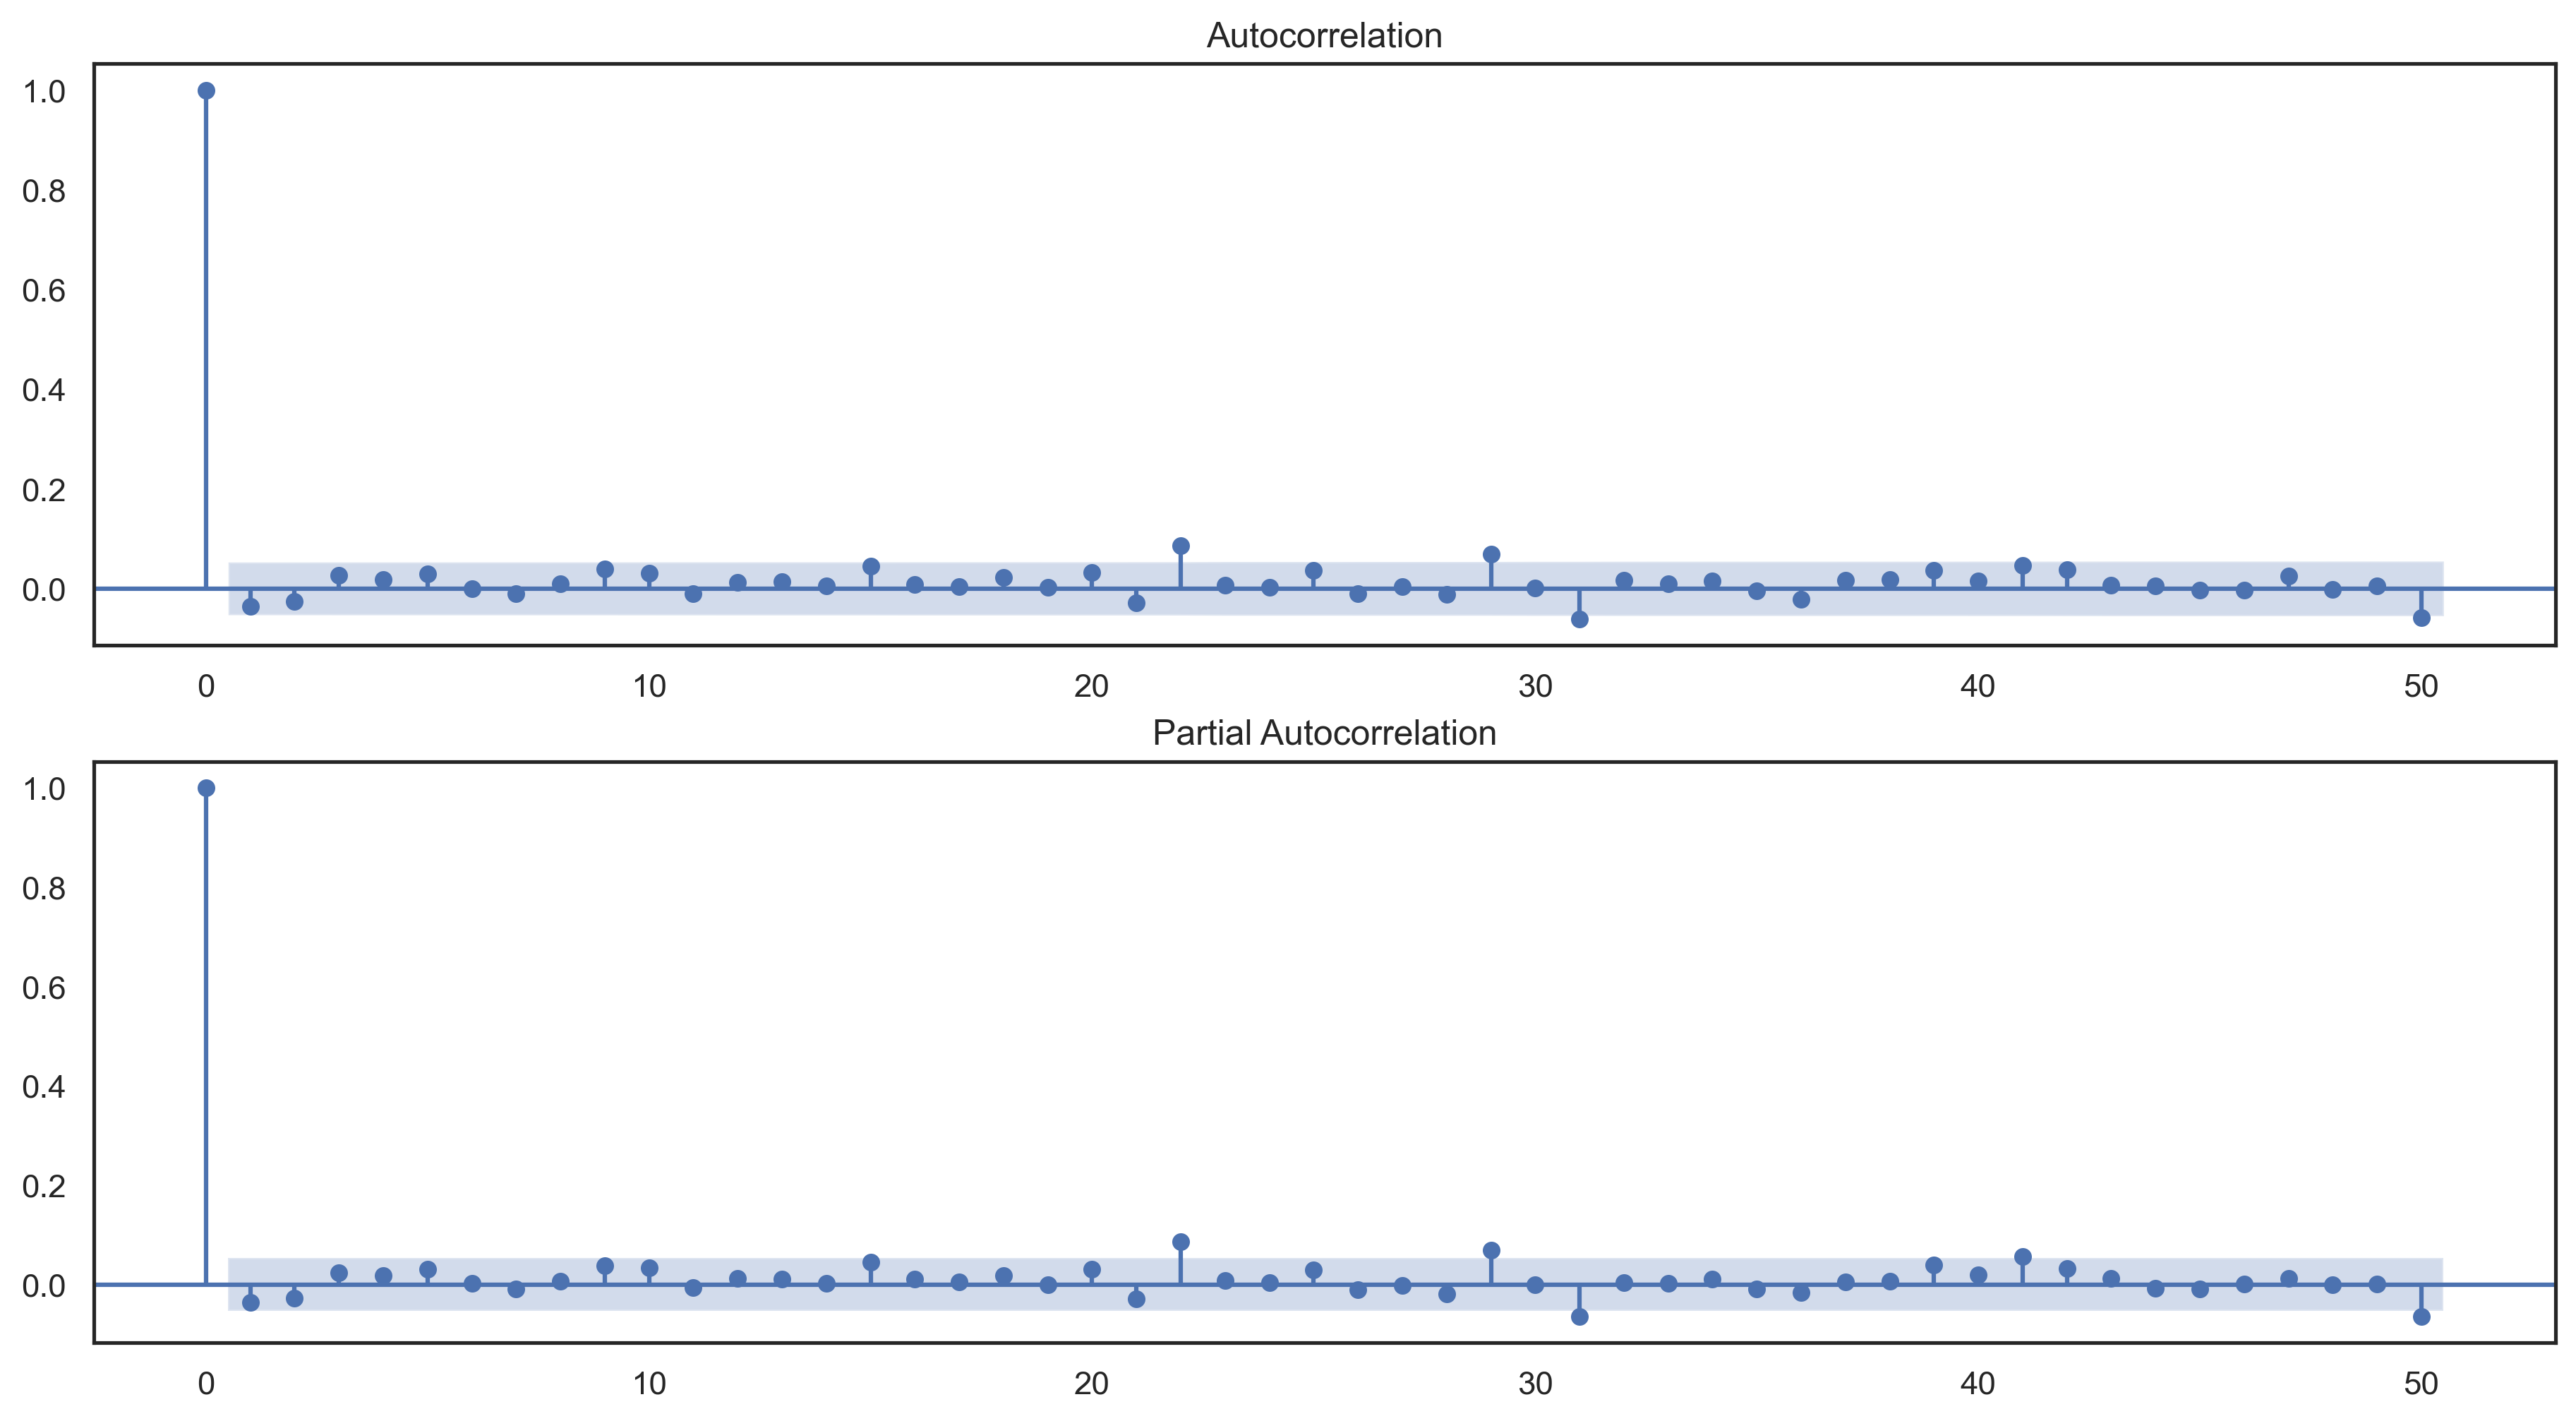

In [23]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:45.97471497448924


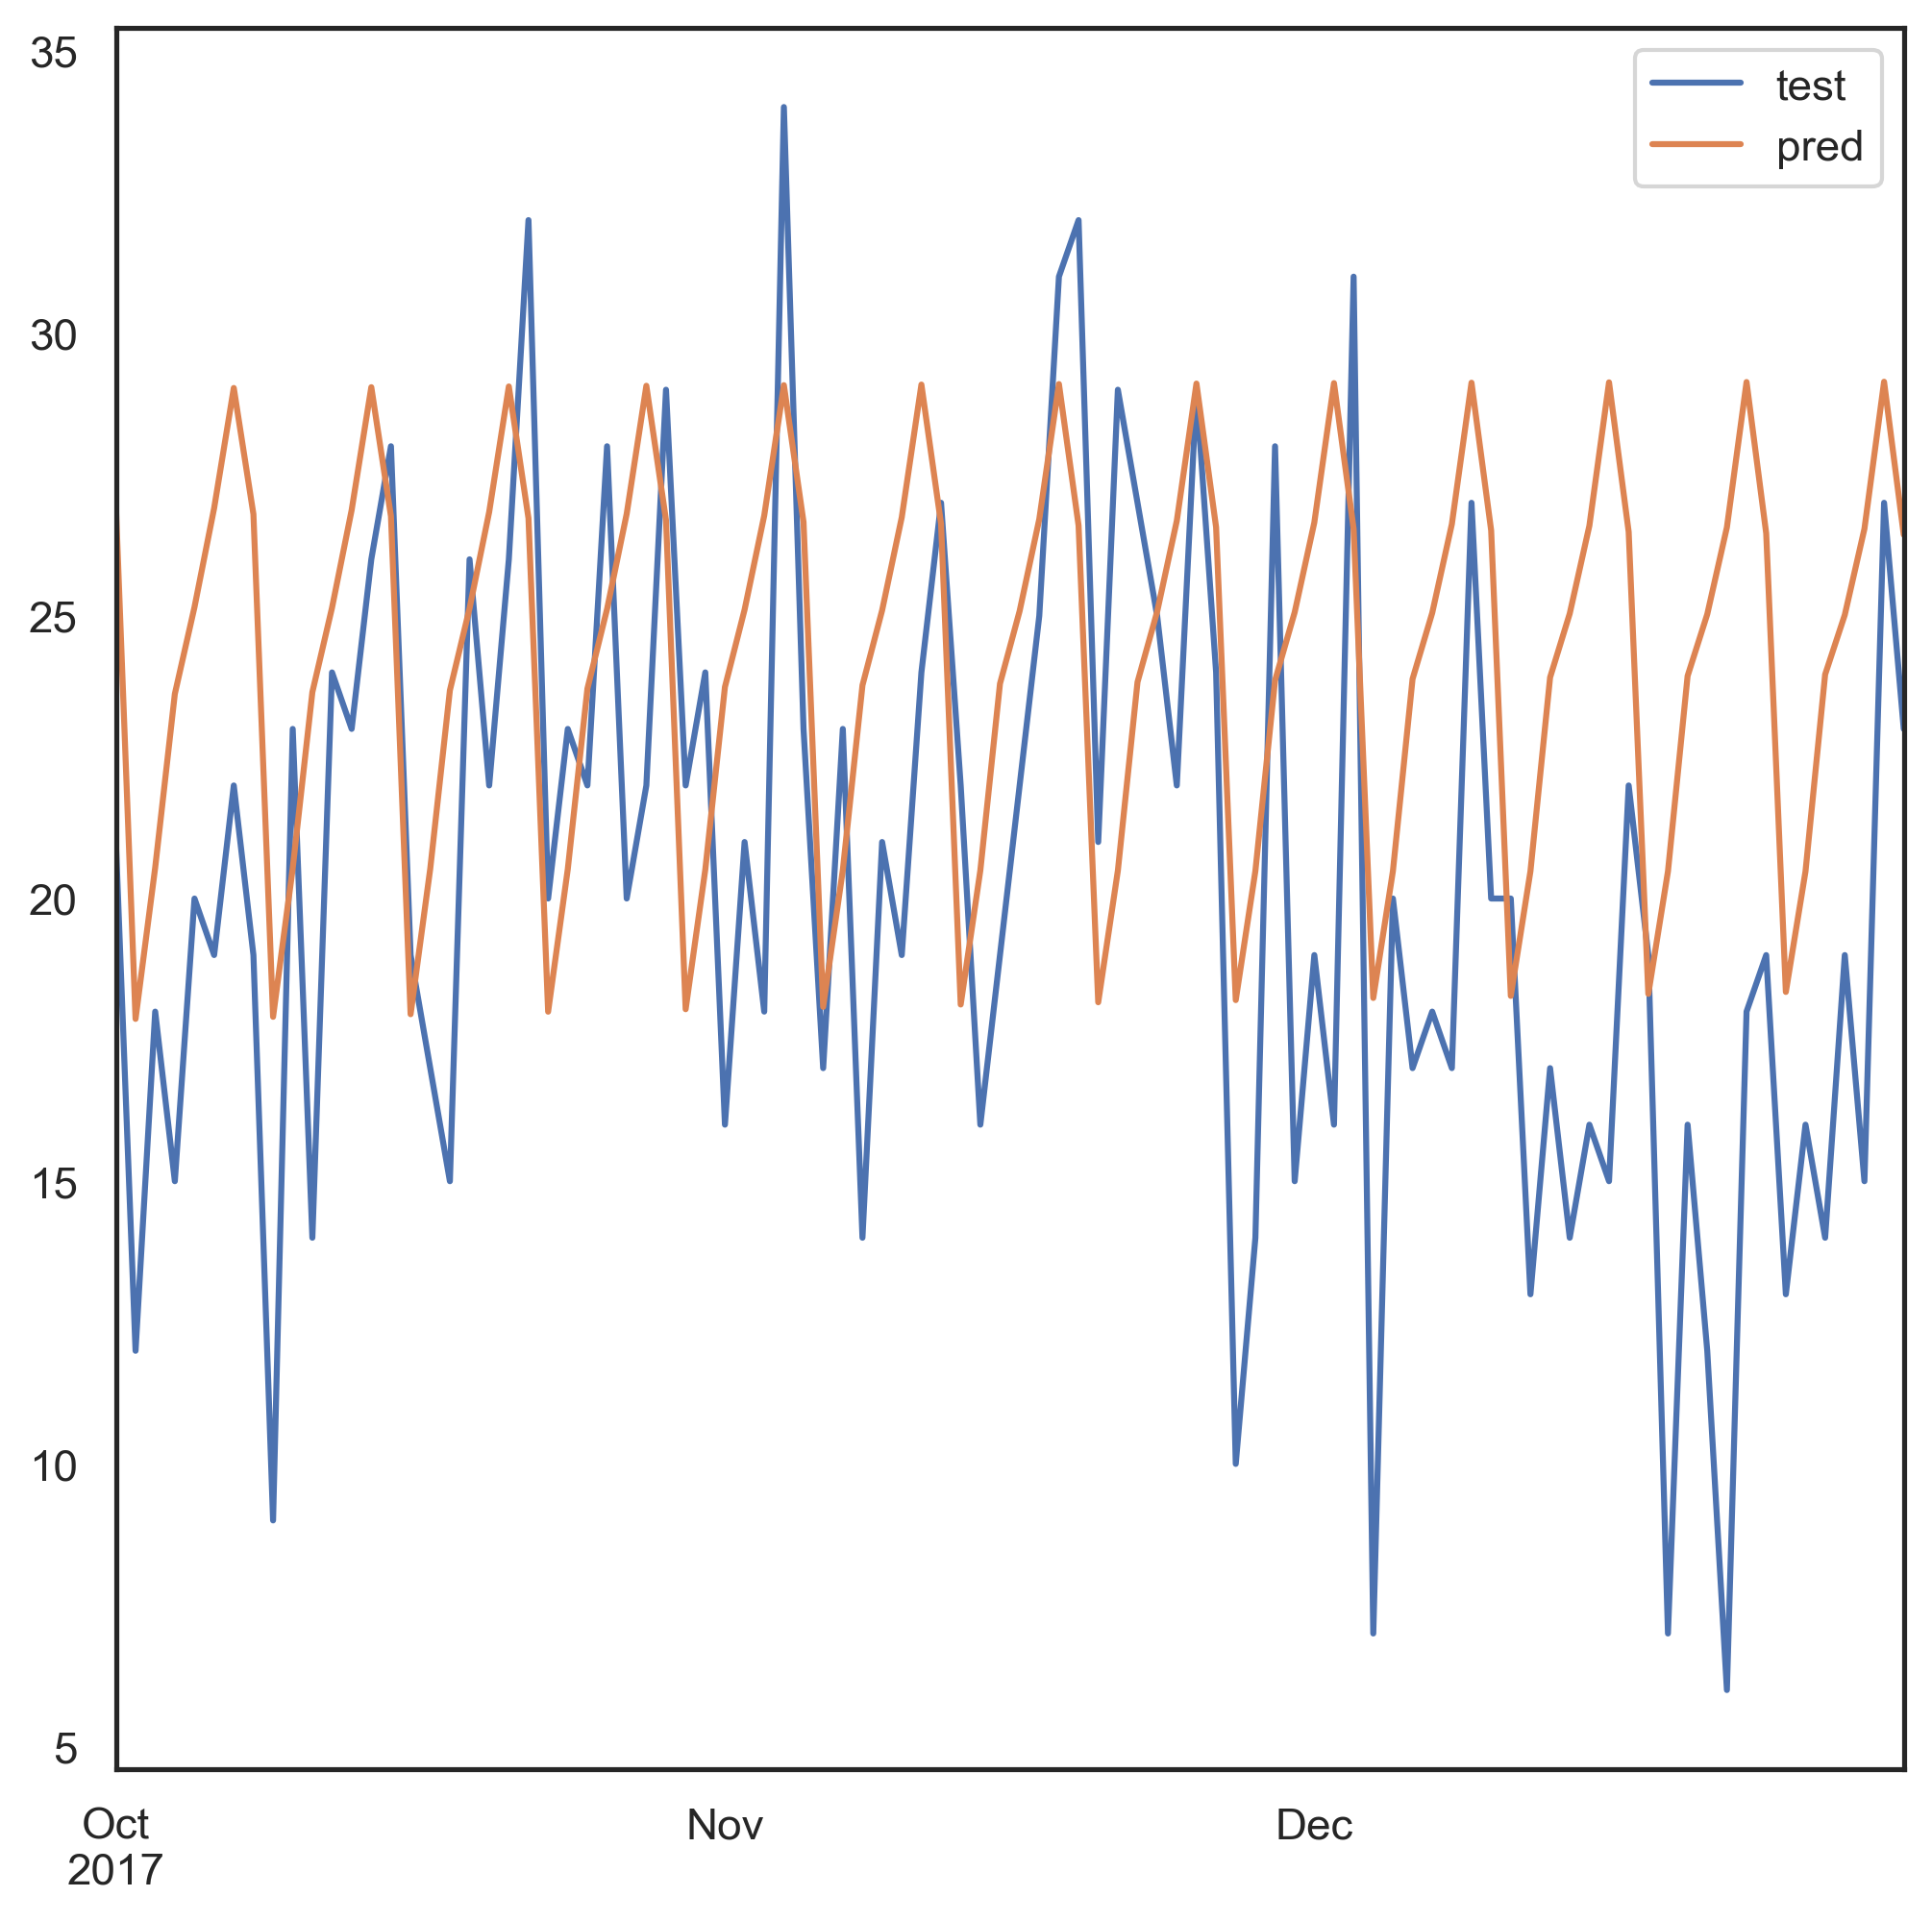

In [25]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [ ]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(7,1,7,1),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarima.summary()